AttributeError: 'GaussianSampler' object has no attribute 'get_positions'

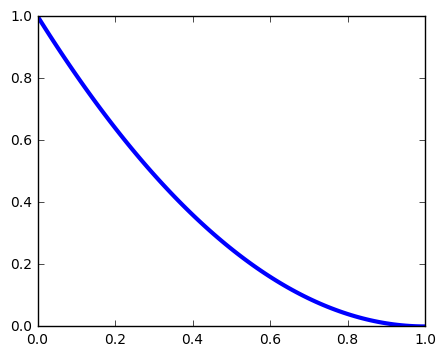

In [1]:
from samplers import *
from solvers import *
from plots import  *
from matplotlib import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

pylab.ion()
N = 10
start_param = [1,-2, 1]
polynomial = SignalPolynomial(start_param)
# print polynomial.degree
plot_results(polynomial,'b',lw =3)

# sampler = DeterministicSampler(polynomial,N)
sampler = GaussianSampler(polynomial,N,1,0.05)
# print sampler.get_positions()
# print sampler.get_samples()
# print sampler.number_samples
stem_results(sampler.get_positions(),sampler.get_samples(),'b')

# solver = OrdinaryLS(sampler.get_samples(),polynomial.degree,SignalPolynomial)
solver = AlternatingLS(
    sampler.get_samples(),
    polynomial.model_size,
    SignalPolynomial,
    False,
    stopping_error=1e-10,
    beta=0.01)

solver.solve()
# print solver.samples
# print solver.make_x()
# print solver.parameter_estimate
print(solver.train_error)
print(polynomial.square_error(SignalPolynomial(solver.parameter_estimate)))
pylab.ioff()
plot_results(SignalPolynomial(solver.parameter_estimate),'r',lw = 3)
stem_results(solver.get_position_estimates(),solver.get_samples(),'r');
pylab.show()
# stem_results(DeterministicSampler(SignalPolynomial(solver.parameter_estimate),N),'g')

In [ ]:
from samplers import *
from solvers import *
from plots import  *
from matplotlib import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

pylab.ion()
start_param = [6, -10, 5, 0.5]
N = 2*(len(start_param))*2
polynomial = FullSurfacePolynomial(start_param)
plot_results(polynomial,'k',lw =1, label='polynomial')

sampler = GaussianSampler(polynomial,N,1,0.04)
noise = 1e-2*nr.randn(N)*0
print(noise)
sample_values = sampler.get_samples() + noise;
# sampler = DeterministicSampler(polynomial,N)
# stem_results(sampler.get_positions(),sampler.get_samples(),'k',label="original")

new_pos = FullSurfacePolynomial.shifted_positions(sampler.get_positions(),trace_param=[-0.5,0.1])
stem_results(new_pos,sample_values,'w',label="start. positions")

solver = ConstrainedALS(
    sample_values,
    polynomial.model_size,
    FullSurfacePolynomial,
    start_pos=new_pos,
    stopping_error=1e-16,
    beta=0.1,
    show_plots = False
    )
solver.solve()

# print solver.train_error
# print polynomial.square_error(SignalPolynomial(solver.parameter_estimate))
pylab.ioff()
# plot_results(SignalPolynomial(solver.parameter_estimate),'r',lw = 3)
stem_results(solver.get_position_estimates(),solver.get_samples(),'g',label="positions found")
print(solver.parameter_estimate)
polynomial = FullSurfacePolynomial(solver.parameter_estimate)
plot_results(polynomial,'g',lw =1, label='recovered')

pylab.title("with scaling", fontsize=10)
pylab.xlabel(r'$t$',fontsize=15)
pylab.legend(loc="lower right", fontsize=10)
pylab.gcf().subplots_adjust(bottom=0.15)
pylab.show()

[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.71428571428571419, 0.8571428571428571, 1.0]
error small enough after fitting parameters
[-0.59999999  1.          1.        ]


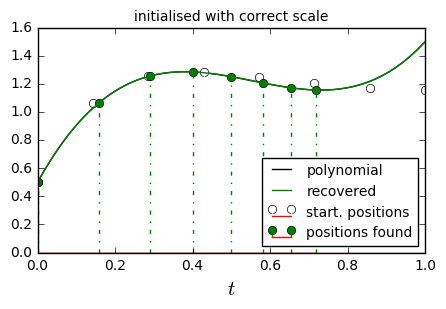

In [4]:
from samplers import *
from solvers import *
from plots import  *
from matplotlib import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

pylab.ion()
start_param = [6, -10, 5, 0.5]
N = 2*(len(start_param))
polynomial = SecondSurfacePolynomial(start_param)
plot_results(polynomial,'k',lw =1, label='polynomial')
f = 1.0
b = 1
sampler = SurfaceSampler(polynomial,N,[-0.6,b,f], interval_length=1, sigma=0.0)
# noise = 1e-2*nr.randn(N)
sample_values = sampler.sample_values; 

start_pos = SecondSurfacePolynomial.shifted_positions(sampler.sample_positions,trace_param=[0,1,f])
print(start_pos)
stem_results(start_pos,sample_values,'w',label="start. positions")

solver = ConstrainedALS(
    sample_values,
    polynomial.model_size,
    SecondSurfacePolynomial,
    start_pos=sampler.sample_positions,
    stopping_error=1e-10,
    beta=1,
    show_plots=False,
    max_iter=10000,
    fl=f
    )
solver.solve()

# print solver.train_error

# print polynomial.square_error(SignalPolynomial(solver.parameter_estimate))
pylab.ioff()
# plot_results(SignalPolynomial(solver.parameter_estimate),'r',lw = 3)
stem_results(solver.get_position_estimates(),solver.get_samples(),'g',label="positions found")
print(solver.tr_param)
polynomial = FullSurfacePolynomial(solver.parameter_estimate)
plot_results(polynomial,'g',lw =1, label='recovered')

pylab.title("initialised with correct scale", fontsize=10)
pylab.xlabel(r'$t$',fontsize=15)
pylab.legend(loc="lower right", fontsize=10)
pylab.gcf().subplots_adjust(bottom=0.15)
pylab.show()

In [8]:
pe = np.array(solver.illustration)
print(pe)

[[ 0.          0.14285714  0.28571429  0.42857143  0.57142857  0.71428571
   0.85714286  1.        ]
 [ 0.          0.14285714  0.28571429  0.42857143  0.57142857  0.71428571
   0.85714286  1.        ]
 [ 0.          0.14285714  0.28571429  0.42857143  0.57142857  0.71428571
   0.85714286  1.        ]
 [ 0.          0.14285714  0.28571429  0.42857143  0.57142857  0.71428571
   0.85714286  1.        ]
 [ 0.          0.14285714  0.28571429  0.42857143  0.57142857  0.71428571
   0.85714286  1.        ]]
